## Hierarchial Clustering

In [66]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 100)

In [67]:
df = pd.read_excel('marketing_campaign1.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### Data Preprocessing

In [68]:
# Checking for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [69]:
# Imputing Missing Values
df['Income'].fillna(df['Income'].median(), inplace=True)

In [70]:
# Converting Categorical features into numerical variables
dt = pd.get_dummies(df[['Education', 'Marital_Status']])
df = pd.concat([df, dt], axis=1)

# Droppint the original columns (categorical)
df.drop(columns=['Education', 'Marital_Status', 'ID'], inplace=True)

In [71]:
# Removing Outliers from Income and Year_Birth based on the finding in EDA
from scipy import stats

for i in df[['Income', 'Year_Birth']]:
    z_score = stats.zscore(df[i])
    filtered_data = (abs(z_score) < 5)
    df = df[filtered_data]

#### Feature Engineering

In [72]:
# Creating a new feature using Dt_Customer
df['CustomerLifetime'] = pd.datetime.now().year - df['Dt_Customer'].dt.year

# Dropping Dt_Customer column
df.drop(columns=['Dt_Customer'], inplace=True)

# Dropping other unused columns
df.drop(columns=['Z_CostContact'], inplace=True)

In [73]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#### Dimensionality Reduction

In [74]:
# Reducing number of dimensions using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(scaled_data)

array([[ 3.81258701e+00, -7.07828720e-01, -4.37015468e-01, ...,
         1.35710627e-14,  5.38201111e-16,  2.68886645e-16],
       [-2.35048994e+00, -5.44059604e-01, -3.13370705e-01, ...,
        -2.94140880e-15, -2.20405232e-16, -1.47299150e-16],
       [ 1.70817134e+00, -3.48520471e-01, -1.37901317e+00, ...,
         7.73215784e-15,  5.98547119e-16,  2.58904083e-16],
       ...,
       [ 1.48039158e+00, -8.33393326e-02,  5.88182604e-01, ...,
         6.84133193e-16,  1.92383093e-17, -4.14244701e-17],
       [ 1.73098087e+00,  1.23518440e+00, -1.05109551e+00, ...,
        -2.36272230e-16, -1.19273880e-16,  2.93435196e-19],
       [-1.58762774e+00,  1.91902162e+00,  1.36687808e+00, ...,
         4.37681925e-16,  2.08547256e-16,  6.35685455e-18]])

In [75]:
# Calculating Explained Variance and Cumulative Explained Variance
import numpy as np

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

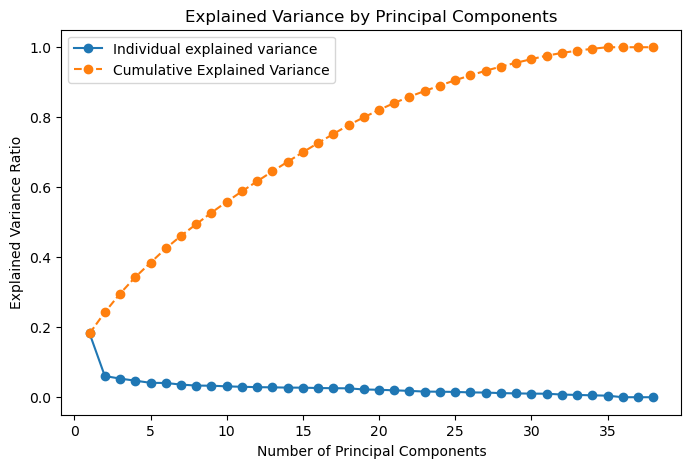

In [76]:
# Plotting explained variance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.plot(
    range(1, len(explained_variance) + 1),
    explained_variance,
    marker = 'o',
    label = 'Individual explained variance'
)
plt.plot(
    range(1, len(explained_variance) + 1),
    cumulative_explained_variance,
    marker = 'o',
    linestyle = '--',
    label = 'Cumulative Explained Variance'
)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

#### Optimal Number of Components

In [77]:
# Finding the optimal number of components
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Optimal number of components to explain 95% of the variance: {optimal_components}')

Optimal number of components to explain 95% of the variance: 29


In [78]:
# Transforming data with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
optimal_data = pca_optimal.fit_transform(scaled_data)

### Hierarchial Clustering Implementation

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [80]:
# Applying Hierarchial Clustering
linked = linkage(optimal_data, method='ward')

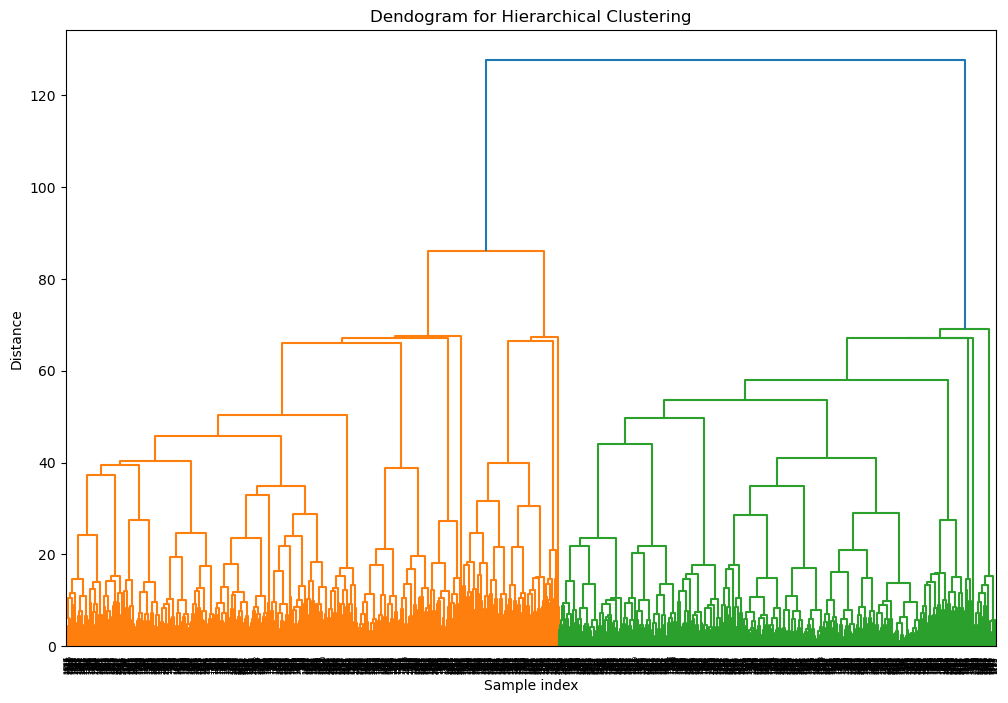

In [81]:
# Plotting the dendogram
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    orientation = 'top',
    distance_sort = 'descending',
    show_leaf_counts=True
)
plt.title('Dendogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.xticks(rotation=90)
plt.ylabel('Distance')
plt.show()

In [82]:
# Choosing the number of clusters
num_clusters = 3

# Assinging cluster labels
df['cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

# Analyzing the clusters
cluster_summary = df.groupby('cluster').mean()
cluster_summary

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,CustomerLifetime
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1971.428164,36929.336346,0.734539,0.492864,48.676499,88.981922,7.569933,39.508088,10.581351,7.316841,23.535680,2.305423,2.684110,0.900095,3.744053,6.447193,0.109420,0.000951,0.000951,0.000000,0.00000,0.019029,11.0,0.111323,0.108468,0.05138,0.513796,0.163654,0.162702,0.000000,0.002854,0.023787,0.457659,0.254044,0.260704,0.000951,0.000000,10.918173
2,1969.200000,77985.391489,0.080851,0.225532,48.646809,798.987234,54.076596,439.902128,81.293617,57.897872,77.634043,1.400000,5.557447,5.770213,8.119149,3.455319,0.165957,0.336170,0.617021,0.565957,0.12766,0.000000,11.0,0.489362,0.059574,0.00000,0.570213,0.140426,0.229787,0.008511,0.000000,0.055319,0.434043,0.225532,0.272340,0.004255,0.000000,10.889362
3,1966.024211,62133.416316,0.212632,0.591579,49.718947,419.733684,40.093684,240.500000,56.532632,41.322105,58.280000,2.577895,5.276842,3.845263,7.490526,4.531579,0.009474,0.091579,0.016842,0.011579,0.00000,0.000000,11.0,0.107368,0.076842,0.00000,0.475789,0.173684,0.273684,0.000000,0.000000,0.203158,0.295789,0.167368,0.252632,0.078947,0.002105,11.052632


#### Evaluating Clusters

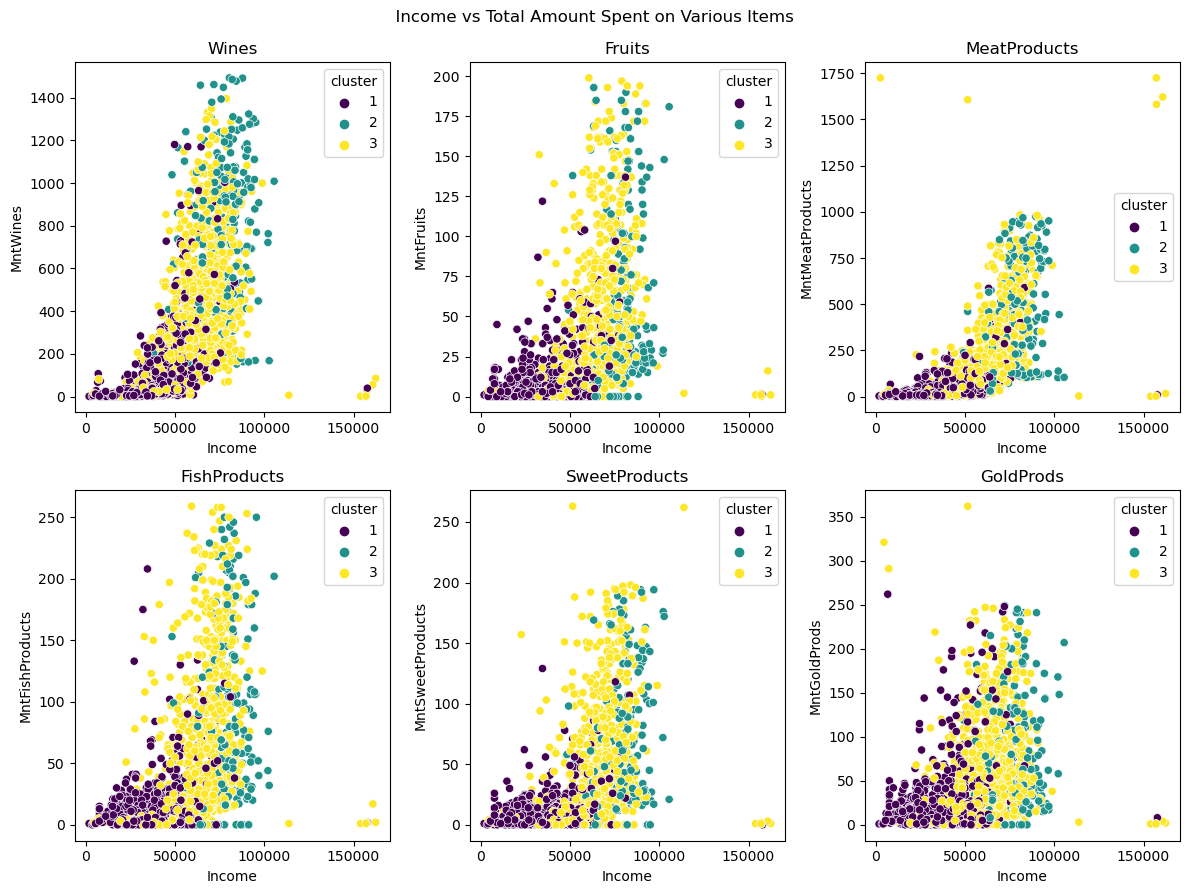

In [83]:
# Relationship between Income and Total Amount Spent on Various Items
plt.figure(figsize=(12,13))
for i, col in enumerate(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x='Income', y=col, hue='cluster', data=df, palette='viridis')
    plt.xlabel('Income')
    plt.title(col[3:])
plt.suptitle('  Income vs Total Amount Spent on Various Items  ')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

In [84]:
results = pd.DataFrame({
    'cluster1': cluster_summary.loc[1][['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']],
    'cluster2': cluster_summary.loc[2][['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']],
    'cluster3': cluster_summary.loc[3][['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
})

#### Cluster Summary

In [85]:
print('Mean Income (Annual) and Mean (monthly) spends across products: ')
display(results)

Mean Income (Annual) and Mean (monthly) spends across products: 


,cluster1,cluster2,cluster3
Income,36929.336346,77985.391489,62133.416316
MntWines,88.981922,798.987234,419.733684
MntFruits,7.569933,54.076596,40.093684
MntMeatProducts,39.508088,439.902128,240.500000
MntFishProducts,10.581351,81.293617,56.532632
MntSweetProducts,7.316841,57.897872,41.322105
MntGoldProds,23.535680,77.634043,58.280000
